<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [ ]:
!wget https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV

--2021-11-10 18:28:23--  https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67183 (66K) [text/plain]
Saving to: ‘weight_data.CSV’

weight_data.CSV     100%[===================>]  65.61K  --.-KB/s    in 0.01s   

2021-11-10 18:28:23 (5.71 MB/s) - ‘weight_data.CSV’ saved [67183/67183]



# Linear Regression

## Import packages


In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

## Loading Data

In [ ]:
data = pd.read_csv('weight_data.CSV',sep=';')
print("Loaded: ",len(data))
y = data.values[:,0]
x = data.values[:,1:]
data

Loaded:  199


,Real Weight,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,30,20.216734,20.591473,20.862815,21.082876,21.961170,23.008404,23.845369,25.852810,26.715498,28.738822,30.448866,30.165725,30.183971,28.252478,27.310475,25.953428,24.757809,24.057983,22.055484,20.114541,18.020647,17.390114,16.260420,14.431770,13.011104,11.320964,9.454773,8.205822
1,30,16.358580,17.948475,18.922227,19.341220,21.115006,22.996339,24.455895,26.089258,26.648218,28.489740,30.408361,30.405284,30.645241,29.286754,27.523205,25.633204,24.104316,23.409304,21.381818,21.141492,21.090736,20.030618,19.561854,17.596822,16.664926,14.639496,13.310592,11.921294
2,30,18.541974,19.393415,20.715872,20.794711,22.889283,24.044060,26.136841,26.822618,27.214711,28.648734,30.426228,30.811116,30.820215,30.439926,29.654349,28.919307,28.020054,25.840811,24.443338,23.255630,22.971649,21.885108,20.566558,20.156233,19.965342,17.914060,16.444254,15.250845
3,30,20.787830,21.712560,22.535063,23.615610,23.774196,24.938504,25.094124,26.149732,27.474697,29.129782,30.829622,30.343048,30.246423,29.857620,29.061254,27.445913,25.505077,25.278630,23.310526,21.513120,21.232630,20.735228,19.619537,17.569506,15.922942,14.703486,13.911107,13.233322
4,30,19.093744,20.634477,22.173730,22.392791,24.472763,25.323968,26.163234,27.975422,28.422492,28.663653,30.809908,30.392548,30.425185,28.969535,27.280572,25.419597,23.974121,23.526355,22.226838,20.443481,19.058634,17.707083,17.314882,17.232952,15.219103,13.907085,12.982010,11.025349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,75,65.469745,66.226849,66.500694,67.950649,70.017205,72.136103,73.023895,74.024775,74.558542,75.504318,75.641807,75.662575,75.874149,74.836788,74.240227,72.767795,71.826029,70.552868,70.490923,69.868137,69.693539,69.000679,67.005969,65.442489,64.641583,63.846277,63.783857,63.573616
195,75,63.816733,65.954598,65.964267,67.488364,68.382093,69.499717,71.276521,72.145537,72.694650,74.360400,75.925086,75.013339,75.349237,74.593905,72.901164,70.889756,70.762950,69.596962,69.064516,69.035449,68.610923,67.479043,66.771656,66.558410,65.700983,65.266628,64.743208,63.316108
196,75,65.786215,67.721361,69.824838,70.310168,71.307659,71.326052,72.050010,72.425910,73.954595,74.459107,75.541380,75.575889,75.091932,74.887379,73.002921,71.046006,70.949416,69.092364,67.873424,67.583285,67.507667,66.331702,65.345967,64.932141,63.734362,62.168726,60.683706,58.759285
197,75,62.688483,64.184743,65.896784,67.294109,67.385624,68.396841,70.167959,71.637006,73.780966,73.942565,75.752993,75.030943,75.166614,73.662947,72.206403,71.847554,70.725120,70.437576,70.340370,69.493374,69.205394,67.770324,67.510636,65.492426,63.440658,61.856313,61.186599,61.010450


Before training the model I split into train and testing model (with stratification)

In [ ]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(samples, labels, random_state=30,stratify=labels,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




Labels distribution: Counter({70.0: 21, 35.0: 20, 40.0: 20, 45.0: 20, 50.0: 20, 55.0: 20, 60.0: 20, 75.0: 20, 30.0: 19, 65.0: 19})
Train labels distribution: Counter({55.0: 10, 60.0: 10, 75.0: 10, 45.0: 10, 35.0: 10, 40.0: 10, 30.0: 10, 70.0: 10, 50.0: 10, 65.0: 9})
Test labels distribution: Counter({70.0: 11, 60.0: 10, 75.0: 10, 50.0: 10, 40.0: 10, 45.0: 10, 55.0: 10, 65.0: 10, 35.0: 10, 30.0: 9})


## Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict test results

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[60.14636279 74.75730604 50.12141768 49.81253833 40.50749378 45.19478044
 30.10630524 55.07425749 65.2351635  30.31304127 50.19287061 70.03947747
 55.39794755 70.11770141 60.00596638 74.92916133 50.07069161 39.8941613
 45.25581064 74.72462661 54.75751985 70.46987959 44.65424343 75.34863815
 29.81119424 75.12789783 65.18230115 69.92281393 49.82934225 44.73855268
 44.96196012 35.08951955 55.06609065 39.91891489 50.02880188 49.80033503
 45.16987683 44.9312463  70.0452506  69.92851358 35.05464605 70.16172494
 44.98778153 30.319948   64.99159616 65.18255329 55.53347063 54.8666399
 70.24564242 65.02404114 29.9260285  65.03670236 54.90193145 64.91137132
 59.94113922 50.27358504 75.12997304 29.95908612 39.99718095 65.43591447
 75.0894216  70.03542047 30.10389147 54.74208628 35.30789533 34.81174859
 60.15873582 75.08595962 44.82032032 35.3288791  35.16816673 30.23319967
 39.89897794 40.08557412 40.47419574 74.91819785 35.22477751 30.27981557
 59.59184724 74.88450848 34.93416243 59.75723447 50.3

In [ ]:
ml.coef_

array([ 0.01734973, -0.05541532, -0.03772034,  0.08677679,  0.01571772,
       -0.01988101, -0.03361816,  0.04588553, -0.08360565,  0.0183223 ,
        0.42418744,  0.31679541,  0.28499663,  0.01850673, -0.00940437,
        0.05490046, -0.0229629 , -0.00224654, -0.00254712, -0.04960739,
        0.03757966, -0.02880566,  0.05416689,  0.01007994, -0.02446067,
       -0.02459611, -0.00261039,  0.01155721])

## Evaluate the model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.999771922195373

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

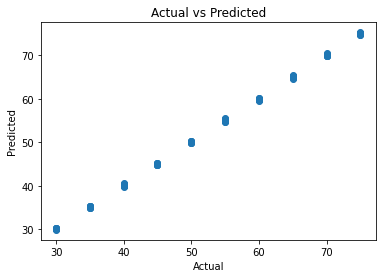

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
